,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29
2000-01-01,1.304717,0.621837,1.337575,2.727350,0.820389,2.363862,1.515410,2.112966,0.154955,1.389692,...,3.548049,4.256659,3.460465,3.509778,3.553931,4.553077,3.456217,4.857210,3.740386,3.439551
2000-01-02,0.060854,2.400067,2.508320,-0.433023,1.297615,1.996023,0.523300,0.855778,0.017140,1.203392,...,3.318831,2.270223,3.807849,3.094688,4.964899,4.233622,5.396025,2.872664,4.954513,2.578208
2000-01-03,1.951100,0.844385,1.291234,2.064477,2.021177,0.481169,2.475096,0.169835,1.545254,1.053206,...,4.373000,3.225170,4.029790,1.176314,4.220163,4.947658,3.851154,4.774367,4.813267,4.960212
2000-01-04,2.238979,2.035929,1.942353,0.969889,0.904673,-0.204090,0.670826,1.241459,1.677694,2.886690,...,4.115164,4.635184,4.468101,3.428610,3.165753,4.347763,4.068016,5.049452,2.881400,3.326213
2000-01-05,-0.557899,0.459519,-0.657035,1.331812,1.914304,-1.571392,0.756521,2.442310,2.680468,0.770929,...,2.353649,3.478763,4.839296,4.127798,2.892500,4.976165,4.937395,3.969305,2.902914,3.349541


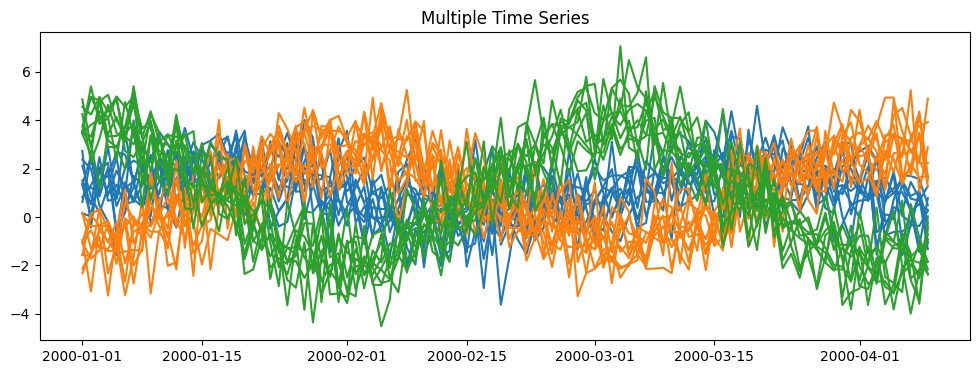

In [81]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.colors as mcolors
colors = list(mcolors.TABLEAU_COLORS.keys())
# colors = matplotlib.colormaps.get_cmap('tab10')

plt.rcParams['figure.figsize'] = (12, 4)
rng = np.random.default_rng(42)

x = np.linspace(0, 10, 100)
date_index = pd.date_range(start='2000-01-01', periods=len(x), freq='D')
data = {}
noise = 1.0
for i in range(30):
    if i < 10:
        data[f'x{i}'] = np.sin(x) + rng.normal(1, noise, len(x))
    elif i >= 10 and i < 20:
        data[f'x{i}'] = -np.cos(x)*2 + rng.normal(1, noise, len(x))
    elif i >= 20:
        data[f'x{i}'] = np.cos(x)*3 + rng.normal(1, noise, len(x))
    plt.plot(date_index, data[f'x{i}'], c=colors[i//10])

df = pd.DataFrame(data, index=date_index)
display(df.head())
plt.title('Multiple Time Series')
plt.show()

,2000-01-01,2000-01-02,2000-01-03,2000-01-04,2000-01-05,2000-01-06,2000-01-07,2000-01-08,2000-01-09,2000-01-10,...,2000-03-31,2000-04-01,2000-04-02,2000-04-03,2000-04-04,2000-04-05,2000-04-06,2000-04-07,2000-04-08,2000-04-09
x0,1.304717,0.060854,1.951100,2.238979,-0.557899,0.181672,1.697475,1.333367,1.706161,0.935902,...,1.993086,1.132275,0.708169,0.951115,-0.757448,-0.617459,-0.591543,-0.361846,0.943137,-0.449500
x1,0.621837,2.400067,0.844385,2.035929,0.459519,1.278414,0.619612,1.310576,2.563271,0.061625,...,3.051366,1.051241,0.748280,2.492278,-0.177160,-0.065074,1.374484,0.240796,0.538241,0.292536
x2,1.337575,2.508320,1.291234,1.942353,-0.657035,1.435133,0.726404,0.430796,0.844810,1.454822,...,1.075723,1.383323,2.602959,-1.535825,0.693036,1.006166,1.027151,0.263487,-1.213359,0.783974
x3,2.727350,-0.433023,2.064477,0.969889,1.331812,0.430953,1.235178,2.949654,2.305618,3.521257,...,-0.982403,1.285114,0.659691,1.490219,1.631840,0.967895,1.491290,0.864613,1.073427,-0.248694
x4,0.820389,1.297615,2.021177,0.904673,1.914304,1.218013,1.452092,2.479129,-0.270098,0.492473,...,2.412988,1.597291,0.845218,1.484799,0.621213,1.765200,-1.100249,0.299794,-1.447449,-1.039082


Cluster labels for the features: [0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1]


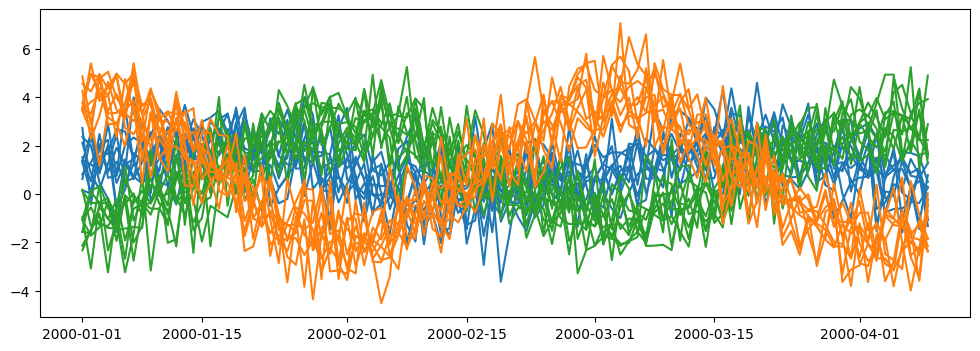

In [82]:
from sklearn.cluster import AgglomerativeClustering

display(df.T.head())
clustering_model = AgglomerativeClustering(n_clusters=3)
labels = clustering_model.fit_predict(df.T)
print(f"Cluster labels for the features: {labels}")

for i, label in enumerate(labels):
    plt.plot(date_index, data[f'x{i}'], c=colors[label])

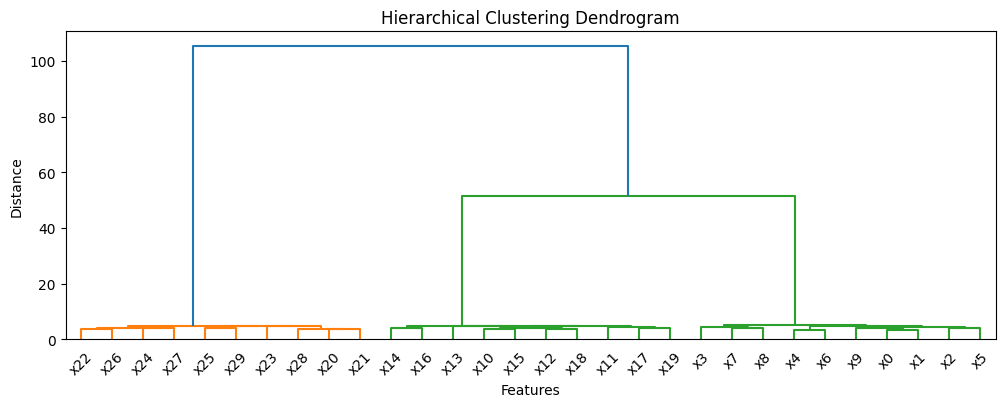

In [74]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(df.T.values, method='ward')
dendrogram(Z, labels=df.columns)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.show()